In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # a specialized 2d plotting library to visualise Numpy computations
import statsmodels.api as sm
    #these where imported after we set up the regression line
import seaborn as sns # a similar package to matplotlib but it's more advanced at it
sns.set() # basically it's like the relationship between css and html XD
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [210]:
data = pd.read_csv('OnlineRetail.csv', nrows=5000)

In [211]:

data1 = data[['Quantity' , 'UnitPrice','CustomerID' , 'InvoiceDate' ]].copy()
data.describe()

,Quantity,UnitPrice,CustomerID
count,5000.000000,5000.000000,3795.000000
mean,9.185800,3.792314,15906.281950
std,144.940788,13.211720,1732.068892
min,-9360.000000,0.000000,12431.000000
25%,1.000000,1.250000,14606.000000
50%,3.000000,2.510000,15862.000000
75%,10.000000,4.210000,17841.000000
max,2880.000000,607.490000,18239.000000


In [212]:
data1['Quantity'] = data['Quantity'][data['Quantity'] >0]
data1['UnitPrice'] = data['UnitPrice'][data['UnitPrice'] !=0 ]

In [213]:
data1.describe()

,Quantity,UnitPrice,CustomerID
count,4928.000000,4988.000000,3795.000000
mean,11.454343,3.801437,15906.281950
std,58.812181,13.226295,1732.068892
min,1.000000,0.030000,12431.000000
25%,1.000000,1.250000,14606.000000
50%,3.000000,2.510000,15862.000000
75%,12.000000,4.210000,17841.000000
max,2880.000000,607.490000,18239.000000


In [214]:
data1.groupby(['CustomerID'])['Quantity'].count()

CustomerID
12431.0    14
12433.0    73
12471.0     0
12472.0     0
12583.0    20
           ..
18085.0     9
18144.0     3
18168.0    10
18229.0     7
18239.0    29
Name: Quantity, Length: 197, dtype: int64

In [215]:
data1.groupby(['CustomerID'])['UnitPrice'].sum()

CustomerID
12431.0     73.90
12433.0    102.67
12471.0      8.50
12472.0     49.45
12583.0     55.29
            ...  
18085.0     34.60
18144.0      7.89
18168.0     70.25
18229.0     48.65
18239.0     96.90
Name: UnitPrice, Length: 197, dtype: float64

In [216]:
data1['InvoiceDate'].astype('str')

0       01-12-2010 08:26
1       01-12-2010 08:26
2       01-12-2010 08:26
3       01-12-2010 08:26
4       01-12-2010 08:26
              ...       
4995    02-12-2010 18:08
4996    02-12-2010 18:08
4997    02-12-2010 18:08
4998    02-12-2010 18:08
4999    02-12-2010 18:08
Name: InvoiceDate, Length: 5000, dtype: object

In [217]:
from datetime import datetime
# format_2 = "%d-%m-%Y %H:%M"
# i=0
# for item in (data1['InvoiceDate']):
#     data1['InvoiceDate'][i] = datetime.strptime(item, format_2)
#     i = i+1

In [218]:
Recency = np.array(data1.groupby(['CustomerID'])['InvoiceDate'].min())
Frequency = np.array(data1.groupby(['CustomerID'])['Quantity'].count())
Monetary = np.array(data1.groupby(['CustomerID'])['UnitPrice'].sum())


In [219]:
import time

current_time = time.strftime("%d-%m-%Y %H:%M")
current_timeDate = datetime.strptime(current_time, "%d-%m-%Y %H:%M")

Recency_days = []
# timeDate = datetime.strptime(data1['InvoiceDate'][102], "%d-%m-%Y %H:%M")
# print(timeDate)
# print(abs((timeDate-current_timeDate).total_seconds()))

for time in Recency:
    timeDate = datetime.strptime(time, "%d-%m-%Y %H:%M")
    time = abs(((timeDate-current_timeDate).total_seconds())/(60*60*24))
    Recency_days.append(time)
               


In [220]:
print(Recency_days)

[4550.644444444444, 4550.5048611111115, 4549.620833333333, 4550.456944444444, 4550.698611111111, 4550.51875, 4550.529861111111, 4550.586111111111, 4550.565277777778, 4549.6625, 4550.528472222222, 4549.540277777778, 4550.434027777777, 4550.381944444444, 4549.367361111111, 4549.339583333333, 4550.70625, 4550.360416666666, 4549.738194444444, 4550.438194444445, 4549.622222222222, 4549.513888888889, 4549.436111111111, 4549.309027777777, 4550.564583333334, 4549.329861111111, 4549.55625, 4549.346527777778, 4550.6194444444445, 4549.615277777778, 4550.610416666666, 4550.4326388888885, 4549.459027777778, 4550.3381944444445, 4550.554861111111, 4550.626388888889, 4549.69375, 4550.620833333333, 4550.688194444445, 4550.5576388888885, 4550.613888888889, 4550.395833333333, 4549.3381944444445, 4549.634722222222, 4549.352777777778, 4550.522916666667, 4549.372916666666, 4550.582638888889, 4549.640277777778, 4549.555555555556, 4550.5256944444445, 4549.68125, 4549.627777777778, 4550.373611111111, 4549.3493

In [221]:
CustomerID = (data1['CustomerID']).unique()
CustomerID = CustomerID[~np.isnan(CustomerID)]
CustomerID

array([17850., 13047., 12583., 13748., 15100., 15291., 14688., 17809.,
       15311., 14527., 16098., 18074., 17420., 16029., 16250., 12431.,
       17511., 17548., 13705., 13747., 13408., 13767., 17924., 13448.,
       15862., 15513., 12791., 16218., 14045., 14307., 17908., 17920.,
       12838., 13255., 16583., 18085., 13758., 13694., 15983., 14849.,
       17968., 16210., 17897., 17377., 16552., 17181., 17951., 14729.,
       12748., 15012., 12868., 17572., 14078., 14001., 12662., 15525.,
       14237., 17905., 15485., 12433., 16955., 15350., 15605., 18144.,
       15922., 14594., 15165., 14911., 16456., 17841., 12472., 17346.,
       17643., 17873., 13093., 12921., 13468., 17760., 16928., 16048.,
       16274., 14496., 14696., 16539., 17025., 13777., 17690., 12947.,
       17460., 18229., 14142., 17069., 13065., 14606., 16835., 15235.,
       13576., 18011., 13090., 15694., 14741., 13715., 14092., 17732.,
       12855., 15752., 17855., 14047., 17925., 13941., 17017., 14135.,
      

In [222]:
data2 = pd.DataFrame({'CustomerID':CustomerID, 'Frequency':Frequency, 'Monetary':Monetary, 'Recency':Recency_days})

In [223]:
data2

,CustomerID,Frequency,Monetary,Recency
0,17850.0,14,73.90,4550.644444
1,13047.0,73,102.67,4550.504861
2,12583.0,0,8.50,4549.620833
3,13748.0,0,49.45,4550.456944
4,15100.0,20,55.29,4550.698611
...,...,...,...,...
192,16754.0,9,34.60,4550.557639
193,16634.0,3,7.89,4550.490278
194,18239.0,10,70.25,4549.345139
195,14576.0,7,48.65,4550.379167


In [224]:
data2.iloc[0]

CustomerID    17850.000000
Frequency        14.000000
Monetary         73.900000
Recency        4550.644444
Name: 0, dtype: float64

In [225]:
customers = data2.to_numpy()

In [226]:
# for element in customers:
len(data2)
lenght = []

In [227]:

from math import *
for i in range(len(data2)):
    for j in range(0, len(data2) - i - 1):
        lenght.append(sqrt((data2.iloc[i][1]-data2.iloc[j][1])**2+(data2.iloc[i][2]-data2.iloc[j][2])**2+(data2.iloc[i][3]-data2.iloc[j][3])**2))

In [228]:
lenght

[0.0,
 65.64093527294492,
 66.88951920672469,
 28.17512477789584,
 19.553389323280452,
 29.54719443692352,
 65.8035191258057,
 58.298421100213154,
 61.91774517342432,
 70.12507907226896,
 35.905931954989384,
 26.142478536431394,
 36.664243823834845,
 23.761603612761498,
 71.55970473555826,
 62.24359535341198,
 9.85778473728746,
 0.8395068662907824,
 67.05603096711363,
 6.629105449644005,
 56.53095911331777,
 48.383548400920304,
 35.200745296718424,
 221.48587615844403,
 47.28177638157294,
 72.0357593792158,
 69.04771297551368,
 27.653863883255283,
 42.98482319377388,
 9.95985863492936,
 9.53922207990047,
 28.44090120923323,
 42.59583562595774,
 37.97990770213246,
 63.82343163113068,
 110.16264532954482,
 24.13946602405895,
 65.25797313343841,
 72.52464694200518,
 12.709446691515549,
 22.616554415780833,
 20.00310744570873,
 72.53639630600972,
 50.529243403855254,
 37.67188477867515,
 34.5241997590208,
 33.63501721256674,
 72.52466008142815,
 6.319529309564476,
 68.26291657270693,
 28.5

In [229]:
data2

,CustomerID,Frequency,Monetary,Recency
0,17850.0,14,73.90,4550.644444
1,13047.0,73,102.67,4550.504861
2,12583.0,0,8.50,4549.620833
3,13748.0,0,49.45,4550.456944
4,15100.0,20,55.29,4550.698611
...,...,...,...,...
192,16754.0,9,34.60,4550.557639
193,16634.0,3,7.89,4550.490278
194,18239.0,10,70.25,4549.345139
195,14576.0,7,48.65,4550.379167


# data3 is just for visualising the data nothing much

In [230]:

q= data2['Monetary'].quantile(0.99)
data3 = data2[data2['Monetary']<q]

data3.describe()

,CustomerID,Frequency,Monetary,Recency
count,195.000000,195.000000,195.000000,195.000000
mean,15492.235897,17.574359,54.425692,4550.004281
std,1705.671306,19.613228,53.180337,0.527002
min,12431.000000,0.000000,0.030000,4549.319444
25%,14069.000000,5.000000,16.025000,4549.494792
50%,15525.000000,12.000000,37.650000,4549.738194
75%,17021.000000,21.000000,72.380000,4550.528819
max,18239.000000,121.000000,286.600000,4550.706250


In [231]:
data2.describe() # we can suspect outliers from the maximums here

,CustomerID,Frequency,Monetary,Recency
count,197.000000,197.000000,197.000000,197.000000
mean,15492.857868,18.908629,61.341320,4550.004343
std,1710.234385,27.905668,97.299243,0.529072
min,12431.000000,0.000000,0.030000,4549.309028
25%,14060.000000,5.000000,16.150000,4549.494444
50%,15525.000000,12.000000,38.050000,4549.738194
75%,17025.000000,21.000000,73.900000,4550.529167
max,18239.000000,297.000000,1176.230000,4550.711806


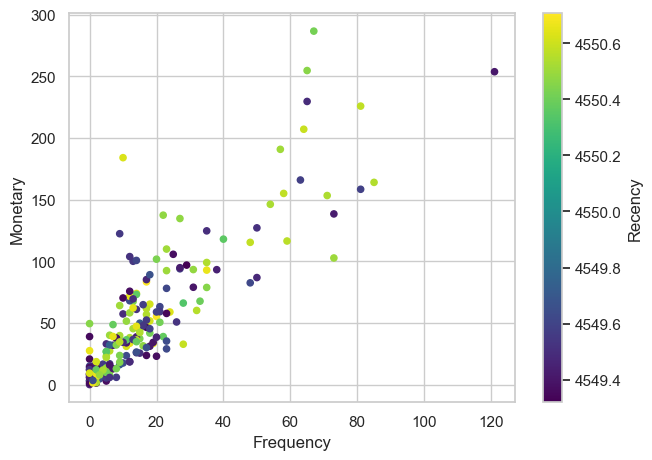

In [232]:
ax1 = data3.plot.scatter(x='Frequency',
                        y='Monetary',
                        c='Recency',
                        colormap='viridis')

In [233]:
# this creates our Kmeans Class

kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=100,
random_state=42
)

In [234]:
kmeans.fit(data2[["Frequency","Monetary","Recency"]])

KMeans(init='random', max_iter=100, n_clusters=3, random_state=42)

In [235]:
# this gives the Lowest SSE value (sum of squares error)
# >>> it is mainly the difference between the estimated value and the actual value 
kmeans.inertia_

249459.41612014713

# and boi.... what the fu- is that number 

In [236]:
kmeans.cluster_centers_

array([[ 297.        , 1176.23      , 4550.71180556],
       [  10.31612903,   32.60535484, 4549.9900224 ],
       [  44.6097561 ,  142.78487805, 4550.04122629]])

cluster 1:  1
cluster 2:  155
cluster 3: 41


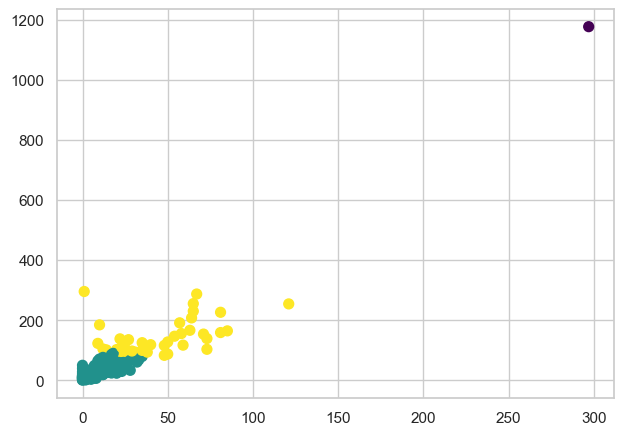

In [237]:
params = kmeans.labels_
cl1=0;cl2=0;cl3=0;cl4=0;
for param in params:
    if param == 0:
        cl1+=1
    elif param == 1:
        cl2+=1
    elif param == 2:
        cl3+=1
#     else:
#         cl4+=1
        
print("cluster 1: " ,cl1)
print("cluster 2: ",cl2)
print("cluster 3:" ,cl3)
# print("cluster 4:" ,cl4)

plt.scatter(data2["Frequency"],data2["Monetary"],c=params, s=50, cmap='viridis') 


# all this bellow is just my own curiosity to search

In [238]:
data4 = data3[["Frequency","Monetary","Recency"]].copy() 
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
} # dk what this is exactly 

# trying to optimize the K-means method --> *optional*
sse = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data4)
    sse.append(kmeans.inertia_)
    
OMP_NUM_THREADS=1

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


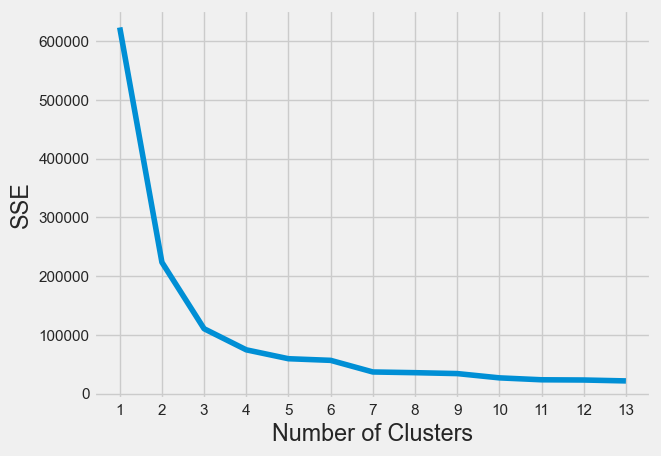

In [239]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 14), sse)
plt.xticks(range(1, 14))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [240]:
kl = KneeLocator(range(1, 14), sse, curve="convex", direction="decreasing")
# i think this is the same as the "point critique" that we studied before 



In [241]:
kl.elbow

3

In [242]:
silhouette_coefficients = []
   
    # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data4)
    score = silhouette_score(data4, kmeans.labels_)
    silhouette_coefficients.append(score)

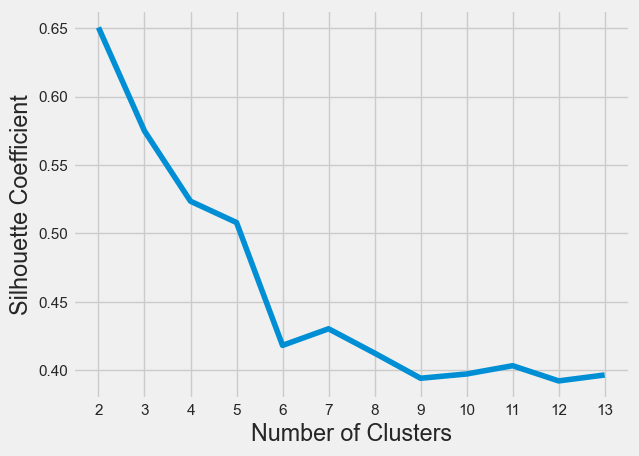

In [243]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 14), silhouette_coefficients)
plt.xticks(range(2, 14))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

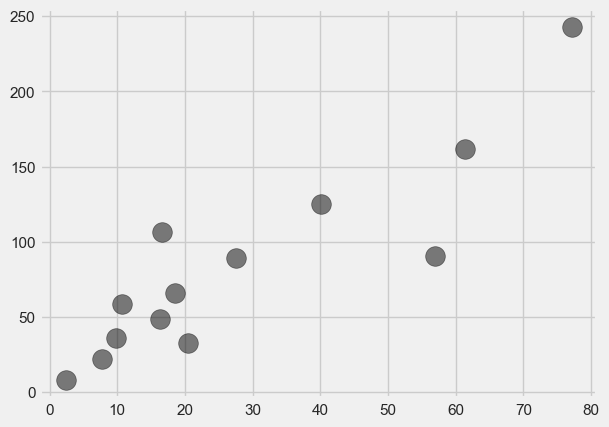

In [244]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [245]:
kmeanz = KMeans(
init="random",
n_clusters=2,
n_init=10,
max_iter=100,
random_state=42
)

kmeanz.fit(data4[["Frequency","Monetary","Recency"]])

KMeans(init='random', max_iter=100, n_clusters=2, random_state=42)

cluster 1:  1
cluster 2:  155
cluster 3: 41


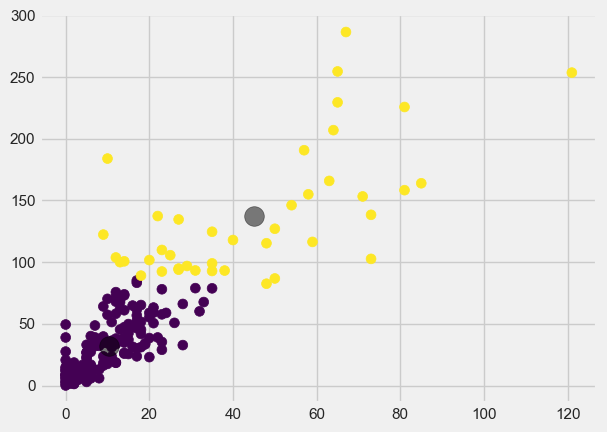

In [246]:
paramz = kmeanz.labels_
cl1=0;cl2=0;cl3=0;cl4=0;
for param in params:
    if param == 0:
        cl1+=1
    elif param == 1:
        cl2+=1
    elif param == 2:
        cl3+=1
#     else:
#         cl4+=1
        
print("cluster 1: " ,cl1)
print("cluster 2: ",cl2)
print("cluster 3:" ,cl3)
# print("cluster 4:" ,cl4)

plt.scatter(data4["Frequency"],data4["Monetary"],c=paramz[:195], s=50, cmap='viridis') 
centers = kmeanz.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# this ^^^^ is done by removing 2 outliers 

# now for the Agglomerative  Algorithme

In [247]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=1).fit(data2[["Frequency","Monetary","Recency"]] )

In [248]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# plot for only the first 500 elements of the dataset for better visualisation

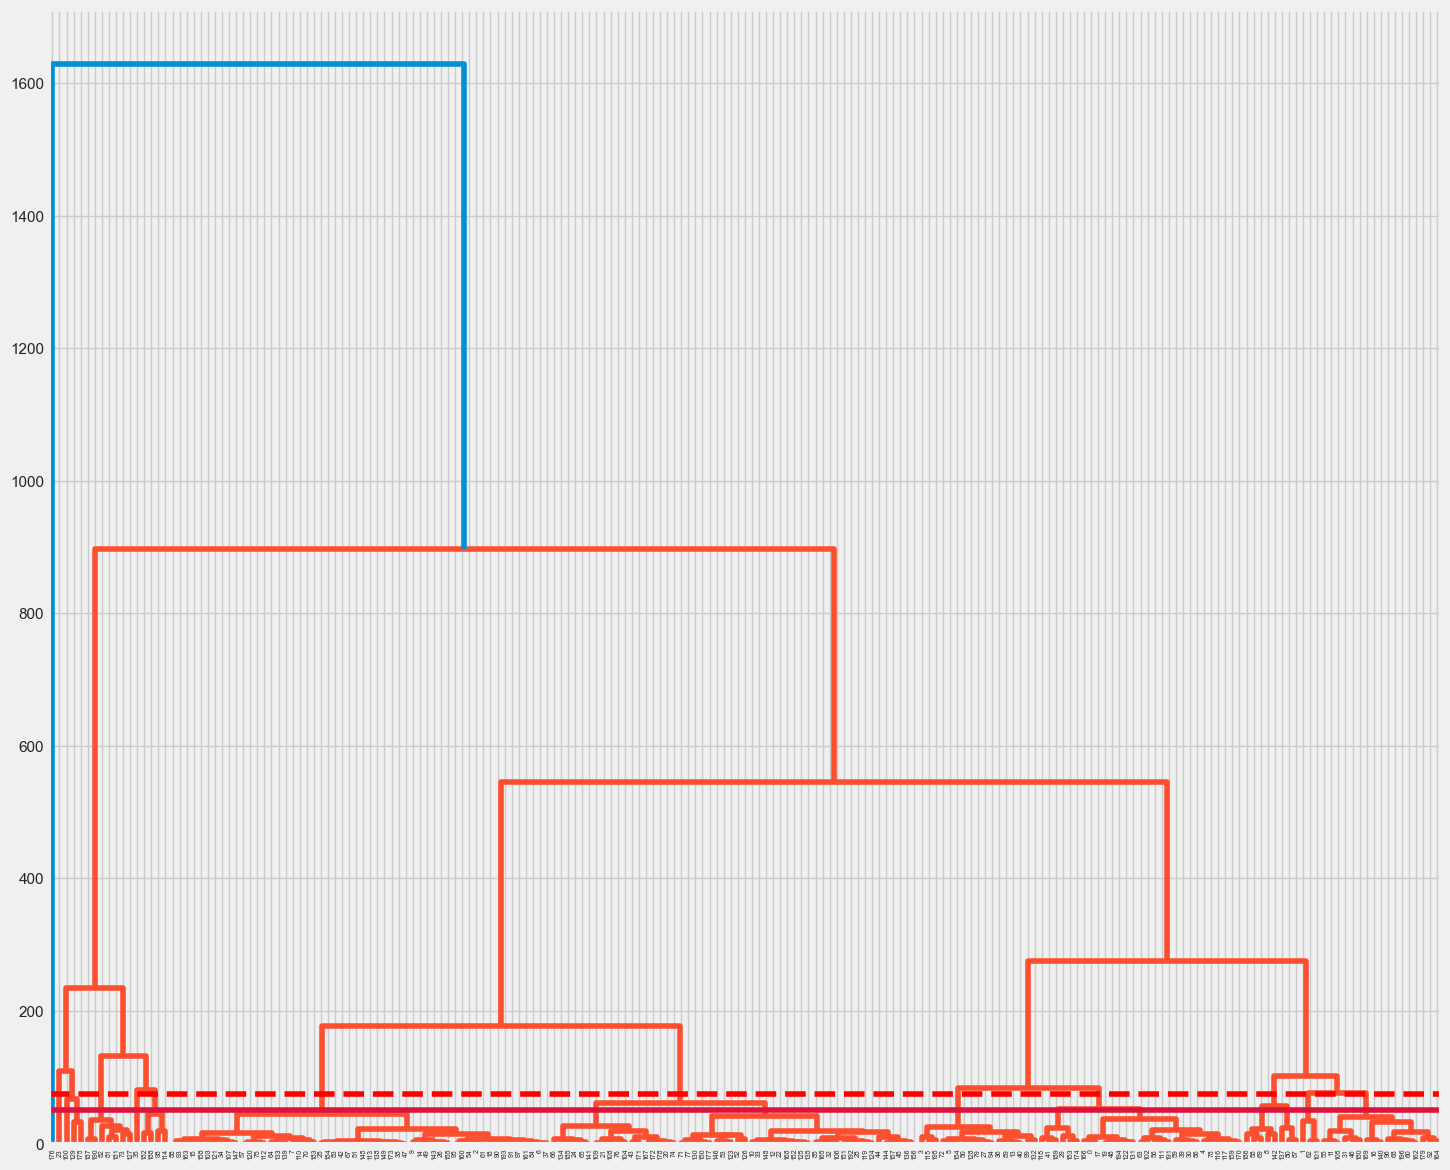

In [264]:
""" from scikit documentation website """
dataX = data2[["Frequency","Monetary","Recency"]].copy()
dataX["Frequency"]=dataX["Frequency"].astype('int')
dataX["Monetary"]=dataX["Monetary"].astype('int')
dataX["Recency"]=dataX["Recency"].astype('int')


clusters = hierarchy.linkage(dataX[:500], method="ward")

from scipy.cluster import hierarchy

plt.figure(figsize=(16,14))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(75,  color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(50,color='crimson'); 